**
# Telecommunications Customer Churn Prediction Analysis**

# Business Understanding

## 1. Introduction
This project aims to assist a telecom company in understanding their data and predicting customer churn. The company has provided access to three different datasets: the first dataset with 3000 records stored in a remote Microsoft SQL Server database, the second dataset with 2000 records stored on OneDrive, and the third dataset hosted on a GitHub repository.

### 1.1. Objectives
Understand the data: Our first objective is to provide insights into the telecom company's data, including customer demographics, services availed, and payment details. This understanding will enable the company to make informed business decisions.

Find the lifetime value of each customer: By analyzing the data, we aim to identify factors that influence the rate at which customers churn. Understanding customer behavior and identifying key predictors will help the telecom company estimate the lifetime value of each customer.

Predict customer churn: The primary objective is to develop a predictive model that accurately determines whether a customer is likely to churn or not. We will employ machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., to build a model that effectively predicts customer churn.

### 1.2. Methodology
To achieve our objectives, we will follow the CRISP-DM framework, which consists of the following steps:

Data exploration: We will thoroughly explore the datasets to gain insights into the available variables, their distributions, and relationships. This step will provide us with an initial understanding of the data and help identify any data quality issues.

Missing value computations: We will identify missing values in the datasets and decide on an appropriate strategy for handling them. This may involve imputing missing values or removing data points with missing values.

Feature engineering: We will perform feature engineering to transform and create new variables that can potentially improve the predictive power of our models. This step may include encoding categorical variables, scaling numerical variables, or creating interaction terms.

Model development: We will utilize various machine learning algorithms such as logistic regression, decision trees, support vector machines, random forest, etc., to develop predictive models for customer churn. We will train the models on a subset of the data and evaluate their performance using appropriate metrics.

Model evaluation and interpretation: We will evaluate the trained models using evaluation metrics such as accuracy, precision, recall, and F1-score. Additionally, we will interpret the models to understand the factors driving customer churn and their relative importance.

Model optimization and hyperparameter tuning: We will fine-tune the models by optimizing their hyperparameters to improve their performance. This step may involve techniques like grid search or random search to find the optimal combination of hyperparameters.

By following this methodology, we aim to provide valuable insights to the telecom company and develop a reliable predictive model for customer churn.

## Hypothesis

H0: The churn rate of customers in the telecom company is not significantly influenced by various factors related to their 
demographics, services, and payment methods.

H1: The churn rate of customers in the telecom company is influenced by various factors related to their demographics, services, and payment methods.

## Questions
1. Is there a relationship between the monthly charges and the likelihood of churn?
2. Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?
3. Does the availability of online security, online backup, device protection, and tech support impact the churn rate?
4. How does the churn rate vary based on the customers' gender?
5. Does the presence of a partner influence the likelihood of churn?
6. Is there a correlation between the tenure of customers and their churn rate?

# Setup

## Installations

In [96]:
%pip install pyodbc
%pip install openpyxl
%pip install imblearn
%pip install xgboost
%pip install python-dotenv

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


## Importation

In [203]:
# Data Handling
import pyodbc
from dotenv import dotenv_values
import numpy as np
import pandas as pd
import math

# Visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Statistical Analysis
from scipy.stats import chi2_contingency
from scipy.stats import randint

# Feature Processing
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline as imbpipeline




# Machine Learning Models
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import os
import joblib


# Model Evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV

# Other Packages
import random
import pickle
import warnings

warnings.filterwarnings("ignore")

## Data Loading

### Load first dataset from SQL database

In [98]:
# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')


# Get the values for the credentials you set in the '.env' file
database = environment_variables.get("database")
server = environment_variables.get("server")
username = environment_variables.get("username")
password = environment_variables.get("password")

# Create a connection string
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password};MARS_Connection=yes;MinProtocolVersion=TLSv1.2;"

In [99]:
connection = pyodbc.connect(connection_string)

In [100]:
# Query the database to retrieve the data
query = "SELECT * FROM LP2_Telco_churn_first_3000"

data = pd.read_sql(query, connection)

In [101]:
# Display the dataframe
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.850000,False
1,5575-GNVDE,Male,False,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.500000,False
2,3668-QPYBK,Male,False,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,False,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.750000,False
4,9237-HQITU,Female,False,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True


### Load second dataset (excelfile)

In [102]:
# Read the csv file into a pandas dataframe
data2 = pd.read_csv('C:/Users/HP/OneDrive/Desktop/Github projects/Customer-churn-Analysis-1/datasets/LP2_Telco-churn-second-2000.csv')

# Display the dataframe
data2.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5600-PDUJF,Male,0,No,No,6,Yes,No,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Credit card (automatic),49.50,312.7,No
1,8292-TYSPY,Male,0,No,No,19,Yes,No,DSL,No,...,Yes,Yes,No,No,Month-to-month,Yes,Credit card (automatic),55.00,1046.5,Yes
2,0567-XRHCU,Female,0,Yes,Yes,69,No,No phone service,DSL,Yes,...,Yes,No,No,Yes,Two year,Yes,Credit card (automatic),43.95,2960.1,No
3,1867-BDVFH,Male,0,Yes,Yes,11,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.35,834.2,Yes
4,2067-QYTCF,Female,0,Yes,No,64,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,111.15,6953.4,No


### Load third dataset (csv file)

In [103]:
# Read third dataset
data3 = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Github projects\Customer-churn-Analysis-1\datasets\Telco-churn-last-2000 .csv')

# Display the dataframe
data3.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Load test data

In [104]:
# Read the csv file into a pandas dataframe
test_data = pd.read_csv(r'C:\Users\HP\OneDrive\Desktop\Github projects\Customer-churn-Analysis-1\datasets\Telco-churn-last-2000 .csv')

# Display the dataframe
test_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


### Train dataset

In [105]:
# Concatenate dataset 1 and 2 to form the train dataset
train_data = pd.concat([data,data2], ignore_index=True)
train_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


## Exploratory Data Analysis

In [106]:
# Get shape of the datasets
train_data.shape, test_data.shape

((5043, 21), (2000, 20))

In [107]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,5043.0,0.162403,0.368857,0.0,0.000,0.000000,0.000000,1.000000
tenure,5043.0,32.576641,24.529807,0.0,9.000,29.000000,56.000000,72.000000
MonthlyCharges,5043.0,65.090214,30.068133,18.4,35.775,70.550003,90.050003,118.650002


In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5043 non-null   object 
 1   gender            5043 non-null   object 
 2   SeniorCitizen     5043 non-null   int64  
 3   Partner           5043 non-null   object 
 4   Dependents        5043 non-null   object 
 5   tenure            5043 non-null   int64  
 6   PhoneService      5043 non-null   object 
 7   MultipleLines     4774 non-null   object 
 8   InternetService   5043 non-null   object 
 9   OnlineSecurity    4392 non-null   object 
 10  OnlineBackup      4392 non-null   object 
 11  DeviceProtection  4392 non-null   object 
 12  TechSupport       4392 non-null   object 
 13  StreamingTV       4392 non-null   object 
 14  StreamingMovies   4392 non-null   object 
 15  Contract          5043 non-null   object 
 16  PaperlessBilling  5043 non-null   object 


In [109]:
# Function to change headers to lowercase
def data_columns_lower(data):
    data.columns = data.columns.str.lower()
    return data

In [110]:
# Change train columns to lowercase
data_columns_lower(train_data)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-VHVEG,Female,0,True,False,1,False,None,DSL,False,...,False,False,False,False,Month-to-month,True,Electronic check,29.850000,29.85,False
1,5575-GNVDE,Male,0,False,False,34,True,False,DSL,True,...,True,False,False,False,One year,False,Mailed check,56.950001,1889.5,False
2,3668-QPYBK,Male,0,False,False,2,True,False,DSL,True,...,False,False,False,False,Month-to-month,True,Mailed check,53.849998,108.150002,True
3,7795-CFOCW,Male,0,False,False,45,False,None,DSL,True,...,True,True,False,False,One year,False,Bank transfer (automatic),42.299999,1840.75,False
4,9237-HQITU,Female,0,False,False,2,True,False,Fiber optic,False,...,False,False,False,False,Month-to-month,True,Electronic check,70.699997,151.649994,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.800000,1990.5,No
5039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.200000,7362.9,No
5040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.600000,346.45,No
5041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.400000,306.6,Yes


In [111]:
# Change test data columns to lowercase
data_columns_lower(test_data)

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,7613-LLQFO,Male,0,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,4568-TTZRT,Male,0,No,No,9,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.40,181.8
2,9513-DXHDA,Male,0,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,2640-PMGFL,Male,0,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,3801-HMYNL,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,7912-SYRQT,Female,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),75.10,552.95
1996,3557-HTYWR,Female,0,No,No,47,Yes,Yes,DSL,Yes,Yes,No,Yes,No,Yes,Two year,No,Mailed check,74.05,3496.3
1997,4816-JBHOV,Male,1,No,No,2,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,44.70,93.7
1998,8920-NAVAY,Male,1,No,No,62,Yes,Yes,Fiber optic,No,Yes,Yes,Yes,Yes,Yes,One year,Yes,Bank transfer (automatic),110.75,7053.35


In [112]:
# check for missing values
train_data.isnull().sum()

customerid            0
gender                0
seniorcitizen         0
partner               0
dependents            0
tenure                0
phoneservice          0
multiplelines       269
internetservice       0
onlinesecurity      651
onlinebackup        651
deviceprotection    651
techsupport         651
streamingtv         651
streamingmovies     651
contract              0
paperlessbilling      0
paymentmethod         0
monthlycharges        0
totalcharges          5
churn                 1
dtype: int64

In [113]:
# Check for duplicates
train_data.duplicated().sum()

np.int64(0)

In [114]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerid        2000 non-null   object 
 1   gender            2000 non-null   object 
 2   seniorcitizen     2000 non-null   int64  
 3   partner           2000 non-null   object 
 4   dependents        2000 non-null   object 
 5   tenure            2000 non-null   int64  
 6   phoneservice      2000 non-null   object 
 7   multiplelines     2000 non-null   object 
 8   internetservice   2000 non-null   object 
 9   onlinesecurity    2000 non-null   object 
 10  onlinebackup      2000 non-null   object 
 11  deviceprotection  2000 non-null   object 
 12  techsupport       2000 non-null   object 
 13  streamingtv       2000 non-null   object 
 14  streamingmovies   2000 non-null   object 
 15  contract          2000 non-null   object 
 16  paperlessbilling  2000 non-null   object 


In [115]:
# Check for test missing values
test_data.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
dtype: int64

### observations from the datasets

The train dataset has 5043 rows (entries), while the test dataset has 2000 rows. Several columns in both datasets contain missing values. 

The 'SeniorCitizens' column in the test dataset is an object while in the train dataset it is an integer.

The 'TotalCharges' column in each dataset represents the total charges for each customer which represents a numeric data type but it is presented as one with object (string) values.

As expected, the test dataset does not have the "Churn" column. This column is not needed because 'Churn' is the variable we want to predict. The goal is to use the trained model to predict whether customers in the test data will churn or not based on the other available features.

##### Transforming the 'TotalCharges' column into a numeric data type

In [116]:
# Transform the 'TotalCharges' column in the train dataset into a numeric data type
train_data['totalcharges'] = pd.to_numeric(train_data['totalcharges'], errors='coerce')

# Confirm the datatype
train_data['totalcharges'].dtype

dtype('float64')

In [117]:
# Transform the 'TotalCharges' column in the test dataset into a numeric data type
test_data['totalcharges'] = pd.to_numeric(test_data['totalcharges'], errors='coerce')

# Confirm the datatype
test_data['totalcharges'].dtype

dtype('float64')

The 'TotalCharges' column in both the train and test datasets has been transformed into a numeric data type (float64) using the pd.to_numeric() function. 

### The Unique Values of The Columns in Datasets

In [118]:
# Check unique values of each column in the train dataset using a for loop 
# Exclude 'tenure', 'MonthlyCharges' and 'TotalCharges' 
for column in train_data.columns:
    if column not in ['customerid','tenure', 'monthlycharges', 'totalcharges']:
        print('Column: {} - Unique Values: {}'.format(column, train_data[column].unique()))
        print('==='*5)

Column: gender - Unique Values: ['Female' 'Male']
Column: seniorcitizen - Unique Values: [0 1]
Column: partner - Unique Values: [True False 'No' 'Yes']
Column: dependents - Unique Values: [False True 'No' 'Yes']
Column: phoneservice - Unique Values: [False True 'Yes' 'No']
Column: multiplelines - Unique Values: [None False True 'No' 'No phone service' 'Yes']
Column: internetservice - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: onlinesecurity - Unique Values: [False True None 'No' 'Yes' 'No internet service']
Column: onlinebackup - Unique Values: [True False None 'No' 'Yes' 'No internet service']
Column: deviceprotection - Unique Values: [False True None 'No' 'Yes' 'No internet service']
Column: techsupport - Unique Values: [False True None 'Yes' 'No' 'No internet service']
Column: streamingtv - Unique Values: [False True None 'No' 'Yes' 'No internet service']
Column: streamingmovies - Unique Values: [False True None 'No' 'Yes' 'No internet service']
Column: contract - Unique Valu

In [119]:
# Check unique values of each column in the test dataset using a for loop
for column in test_data.columns:
    if column not in ['customerID','tenure', 'MonthlyCharges', 'TotalCharges']:
        print('Column: {} - Unique Values: {}'.format(column, test_data[column].unique()))
        print('==='*5)

Column: customerid - Unique Values: ['7613-LLQFO' '4568-TTZRT' '9513-DXHDA' ... '4816-JBHOV' '8920-NAVAY'
 '1699-TLDLZ']
Column: gender - Unique Values: ['Male' 'Female']
Column: seniorcitizen - Unique Values: [0 1]
Column: partner - Unique Values: ['No' 'Yes']
Column: dependents - Unique Values: ['No' 'Yes']
Column: phoneservice - Unique Values: ['Yes' 'No']
Column: multiplelines - Unique Values: ['Yes' 'No' 'No phone service']
Column: internetservice - Unique Values: ['Fiber optic' 'No' 'DSL']
Column: onlinesecurity - Unique Values: ['No' 'No internet service' 'Yes']
Column: onlinebackup - Unique Values: ['No' 'No internet service' 'Yes']
Column: deviceprotection - Unique Values: ['No' 'No internet service' 'Yes']
Column: techsupport - Unique Values: ['No' 'No internet service' 'Yes']
Column: streamingtv - Unique Values: ['Yes' 'No internet service' 'No']
Column: streamingmovies - Unique Values: ['No' 'No internet service' 'Yes']
Column: contract - Unique Values: ['Month-to-month' 'O

There are some differences between the unique values in the train_data and test_data datasets:
i. 'SeniorCitizen' column: The train_data dataset has boolean values (False and True), while the test_data dataset has numeric values (0 and 1).
ii. 'Partner and Dependents' columns: In the train_data dataset, this column contain boolean  (True and False) and string values (Yes and No), while in the test_data dataset, they contain categorical values (Yes and No).

iii. 'PhoneService' column: In the train_data dataset, these columns contain boolean  (True and False) and and string values (Yes and No), while in the test_data dataset, it contains categorical values (Yes and No).

iv. 'MultipleLines' column: In the train_data dataset, this column contains boolean values (False and True) and string values (No, Yes, No phone service), while in the test_data dataset, it contains categorical values (Yes, No, and No phone service).

v. 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies'  columns: The training data in these columns contains a mix of boolean (True and False)  and string values (No, Yes, No internet service), while the test data only has the string values (No, Yes, No internet service). 

vi. 'PaperlessBilling' column: The training data has boolean values (True and False) and additional string values ('Yes', 'No') compared to the test data which only has string values ('Yes', 'No').

vii. 'PaymentMethod' column: Some values contain in parenthesis the word 'automatic'. These denominations are too long to be used as tick labels in visualizations.

viii. 'Churn' column: The train_df dataset has boolean values (False and True) and categorical values (None, No, and Yes) in the 'Churn' column. The test_df dataset does not have a 'Churn' column as explained earlier.

#### Fixing the Issues Identified With The Unique Values in The Columns 

In [120]:
# Drop the customer ID column
train_data.drop('customerid', axis=1, inplace=True)
# Drop the customer ID column
test_data.drop('customerid', axis=1, inplace=True)

##### Removing 'automatic' from Payment Method names

In [121]:
train_data['paymentmethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [122]:
# Remove 'automatic' from payment method names in the train dataset
train_data['paymentmethod'] = train_data['paymentmethod'].str.replace(' (automatic)', '', regex=False)

# Unique elements of the 'PaymentMethod' column after the modification 
train_data['paymentmethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [123]:
# Remove 'automatic' from payment method names in the test dataset
test_data['paymentmethod'] = test_data['paymentmethod'].str.replace('(automatic)', '', regex=False)

# Unique elements of the 'PaymentMethod' column after the modification 
test_data['paymentmethod'].unique()

array(['Electronic check', 'Mailed check', 'Credit card ',
       'Bank transfer '], dtype=object)

##### Modifying Unique Values for Columns In Both Datasets for Consistency

In [124]:
# Modifying The 'SeniorCitizen' column
test_data['seniorcitizen'] = test_data['seniorcitizen'].replace({0: 'No', 1: 'Yes'})

# Modifying selected columns in the train and test datasets using a for loop
columns_to_modify = ['partner', 'seniorcitizen','dependents', 'phoneservice', 'multiplelines',
                          'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                          'streamingtv', 'streamingmovies', 'paperlessbilling']

# Iterate over the columns to replace the unique values using a for loop
for column in columns_to_modify:
    # Replace boolean values with 'No' and 'Yes' in the train dataset
    train_data[column] = train_data[column].replace({False: 'No', True: 'Yes', 'No internet service': 'No','No phone service': 'No'})
    # Replace boolean values with 'No' and 'Yes' in the test dataset
    test_data[column] = test_data[column].replace({False: 'No', True: 'Yes', 'No internet service': 'No','No phone service': 'No'})

# Modifying The 'Churn' column
train_data['churn'] = train_data['churn'].replace({False: 'No', True: 'Yes'})

# convert senior citizen to object
train_data['seniorcitizen'] = train_data['seniorcitizen'].replace({0:'No', 1:'Yes'})

In [125]:
print(train_data.columns)


Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')


##### Confirming the consistency of the modified unique values for Columns In Both Datasets

In [126]:
# Check unique values of each column
for column in train_data.columns:
    if column not in ['tenure', 'monthlycharges', 'totalcharges']:
        print('Column: {} - Unique Values: {}'.format(column, train_data[column].unique()))
        print('==='*5)

Column: gender - Unique Values: ['Female' 'Male']
Column: seniorcitizen - Unique Values: ['No' 'Yes']
Column: partner - Unique Values: ['Yes' 'No']
Column: dependents - Unique Values: ['No' 'Yes']
Column: phoneservice - Unique Values: ['No' 'Yes']
Column: multiplelines - Unique Values: [None 'No' 'Yes']
Column: internetservice - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: onlinesecurity - Unique Values: ['No' 'Yes' None]
Column: onlinebackup - Unique Values: ['Yes' 'No' None]
Column: deviceprotection - Unique Values: ['No' 'Yes' None]
Column: techsupport - Unique Values: ['No' 'Yes' None]
Column: streamingtv - Unique Values: ['No' 'Yes' None]
Column: streamingmovies - Unique Values: ['No' 'Yes' None]
Column: contract - Unique Values: ['Month-to-month' 'One year' 'Two year']
Column: paperlessbilling - Unique Values: ['Yes' 'No']
Column: paymentmethod - Unique Values: ['Electronic check' 'Mailed check' 'Bank transfer' 'Credit card']
Column: churn - Unique Values: ['No' 'Yes' None]


In [127]:
# Check unique values of each column
for column in test_data.columns:
    if column not in ['tenure', 'monthlycharges', 'totalcharges']:
        print('Column: {} - Unique Values: {}'.format(column, test_data[column].unique()))
        print('==='*5)

Column: gender - Unique Values: ['Male' 'Female']
Column: seniorcitizen - Unique Values: ['No' 'Yes']
Column: partner - Unique Values: ['No' 'Yes']
Column: dependents - Unique Values: ['No' 'Yes']
Column: phoneservice - Unique Values: ['Yes' 'No']
Column: multiplelines - Unique Values: ['Yes' 'No']
Column: internetservice - Unique Values: ['Fiber optic' 'No' 'DSL']
Column: onlinesecurity - Unique Values: ['No' 'Yes']
Column: onlinebackup - Unique Values: ['No' 'Yes']
Column: deviceprotection - Unique Values: ['No' 'Yes']
Column: techsupport - Unique Values: ['No' 'Yes']
Column: streamingtv - Unique Values: ['Yes' 'No']
Column: streamingmovies - Unique Values: ['No' 'Yes']
Column: contract - Unique Values: ['Month-to-month' 'One year' 'Two year']
Column: paperlessbilling - Unique Values: ['Yes' 'No']
Column: paymentmethod - Unique Values: ['Electronic check' 'Mailed check' 'Credit card ' 'Bank transfer ']


# Bivariate Analysis

## 1. Monthly Charges vs. Churn

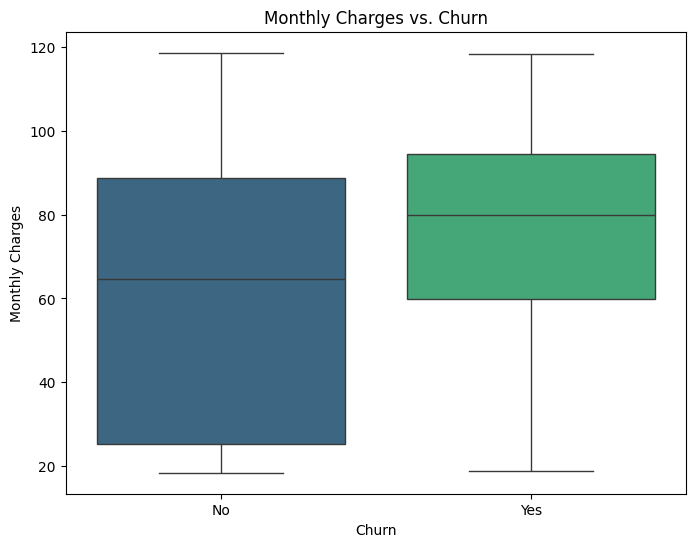

In [128]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='monthlycharges', data=train_data, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges vs. Churn')
plt.show()

There is a slight difference in monthly charges between churned and non-churned customers. Churned customers tend to have higher monthly charges compared to non-churned customers.

## 2. Churn Distribution by Internet Service Type

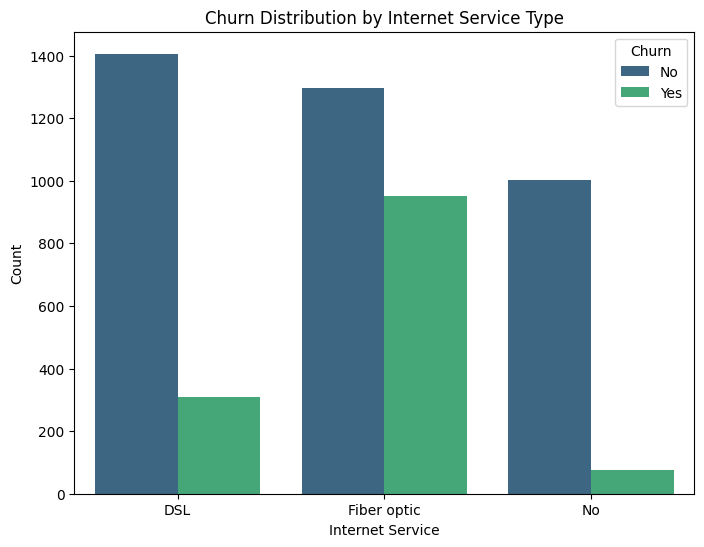

In [129]:
plt.figure(figsize=(8, 6))
sns.countplot(x='internetservice', hue='churn', data=train_data, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn Distribution by Internet Service Type')
plt.legend(title='Churn', loc='upper right')
plt.show()

Customers with fiber optic internet service have a higher churn rate compared to those with DSL or no internet service.

## 3. Churn Distribution by Gender

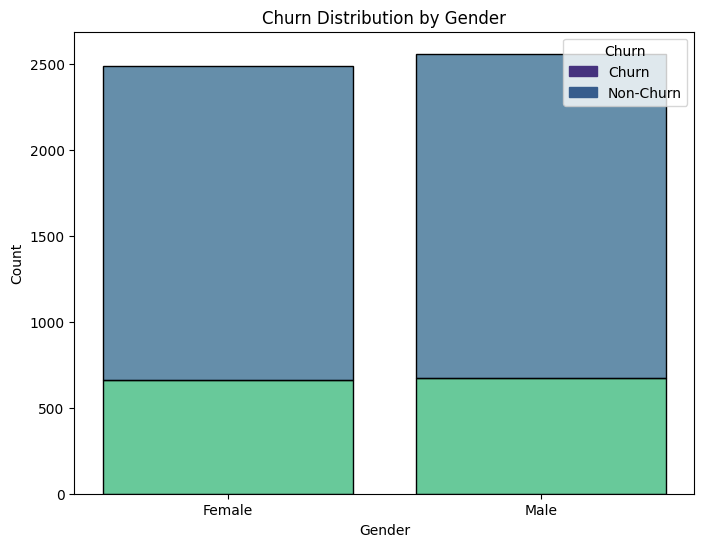

In [130]:
plt.figure(figsize=(8, 6))
sns.histplot(data=train_data, x='gender', hue='churn', multiple='stack', shrink=0.8, palette='viridis')

# Create custom legend patches
churn_patch = mpatches.Patch(color=sns.color_palette('viridis')[0], label='Churn')
non_churn_patch = mpatches.Patch(color=sns.color_palette('viridis')[1], label='Non-Churn')

# Add legend with custom patches
plt.legend(handles=[churn_patch, non_churn_patch], title='Churn', loc='upper right')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Distribution by Gender')
plt.show()

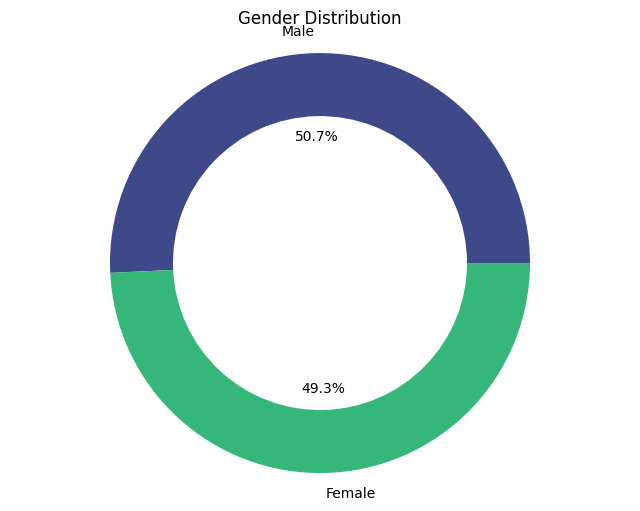

In [131]:
plt.figure(figsize=(8, 6))
sizes = train_data['gender'].value_counts(normalize=True)
colors = ["#3E4989", "#35B779"] 

plt.pie(sizes, labels=sizes.index, autopct='%1.1f%%', colors=colors, wedgeprops=dict(width=0.3))
plt.title('Gender Distribution')
plt.axis('equal')
plt.show()

Gender Imbalance: The dataset contains a higher proportion of male customers compared to female customers.

Churn Rate: The churn rate is slightly higher for male customers compared to female customers. This suggests that gender may have a minor influence on customer churn, but it is not a strong determining factor.

## 4. Churn Distribution by Tenure

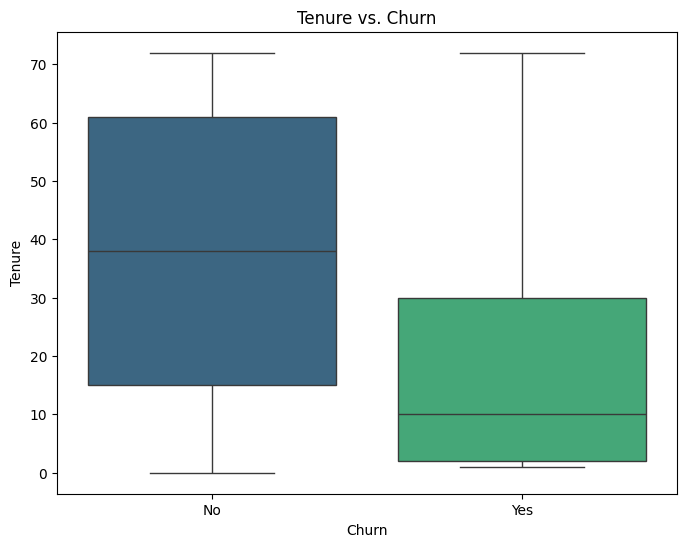

In [132]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='churn', y='tenure', data=train_data, palette='viridis')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.title('Tenure vs. Churn')
plt.show()

Customers with lower tenure have a higher churn rate, while those with higher tenure are less likely to churn. There is an inverse relationship between tenure and churn rate.

## 5. Demographic Information Vs. Churn

In [133]:
def percentage_stacked_plot(columns_to_plot, super_title):
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot) / 2)

    # create a figure
    fig, axes = plt.subplots(number_of_rows, number_of_columns, figsize=(12, 5 * number_of_rows))
    fig.suptitle(super_title, fontsize=22, y=.95)

    # loop through each column name to create a subplot
    for column, ax in zip(columns_to_plot, axes.flatten()):
        # calculate the percentage of observations of the response variable for each group of the independent variable
        prop_by_independent = pd.crosstab(train_data[column], train_data['churn']).apply(lambda x: x / x.sum() * 100, axis=1)

        # plot the stacked bar chart using the 'viridis' colors
        prop_by_independent.plot(kind='bar', ax=ax, stacked=True, rot=0, color=["#3E4989", "#35B779"])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5), title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column, fontsize=8, loc='left')
        ax.tick_params(rotation='auto')

        # remove the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)

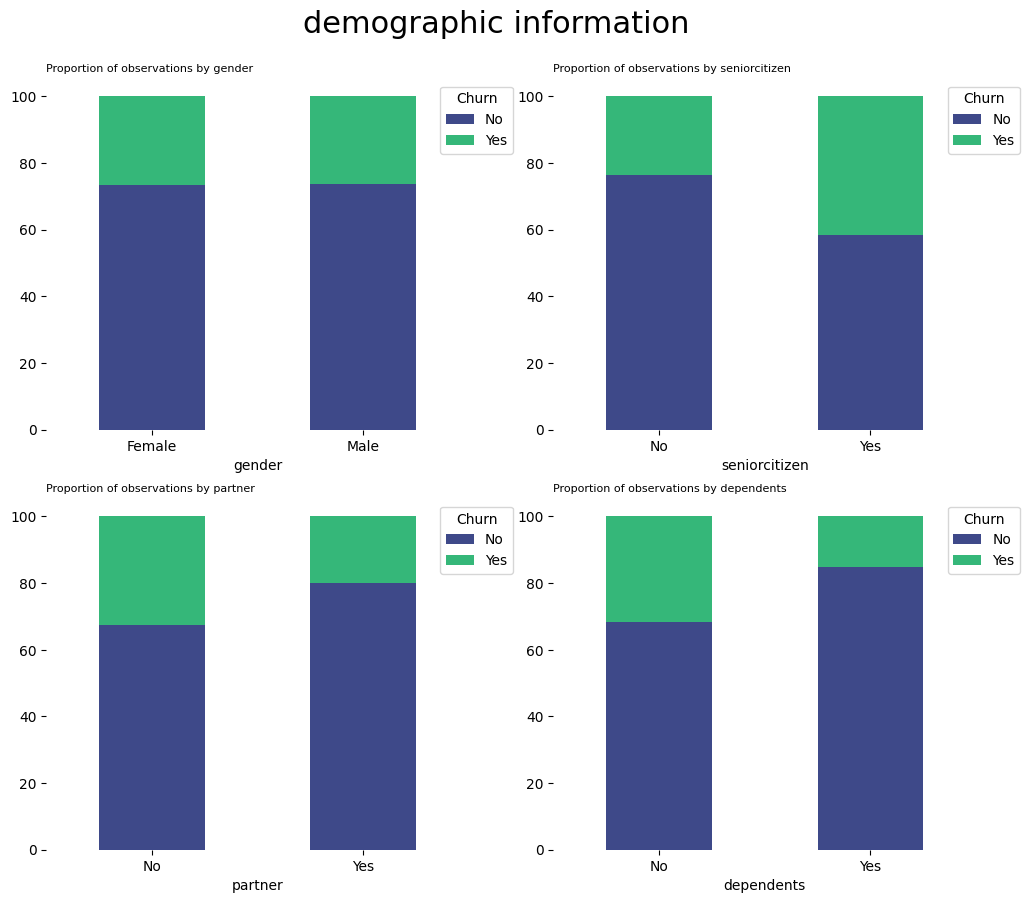

In [134]:
# demographic column names
demographic_columns = ['gender', 'seniorcitizen', 'partner', 'dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'demographic information')

The churn rate of senior citizens is almost double that of young citizens.
Customers with a partner churn less than customers with no partner.

## 6. Customer Account Information Vs. Churn

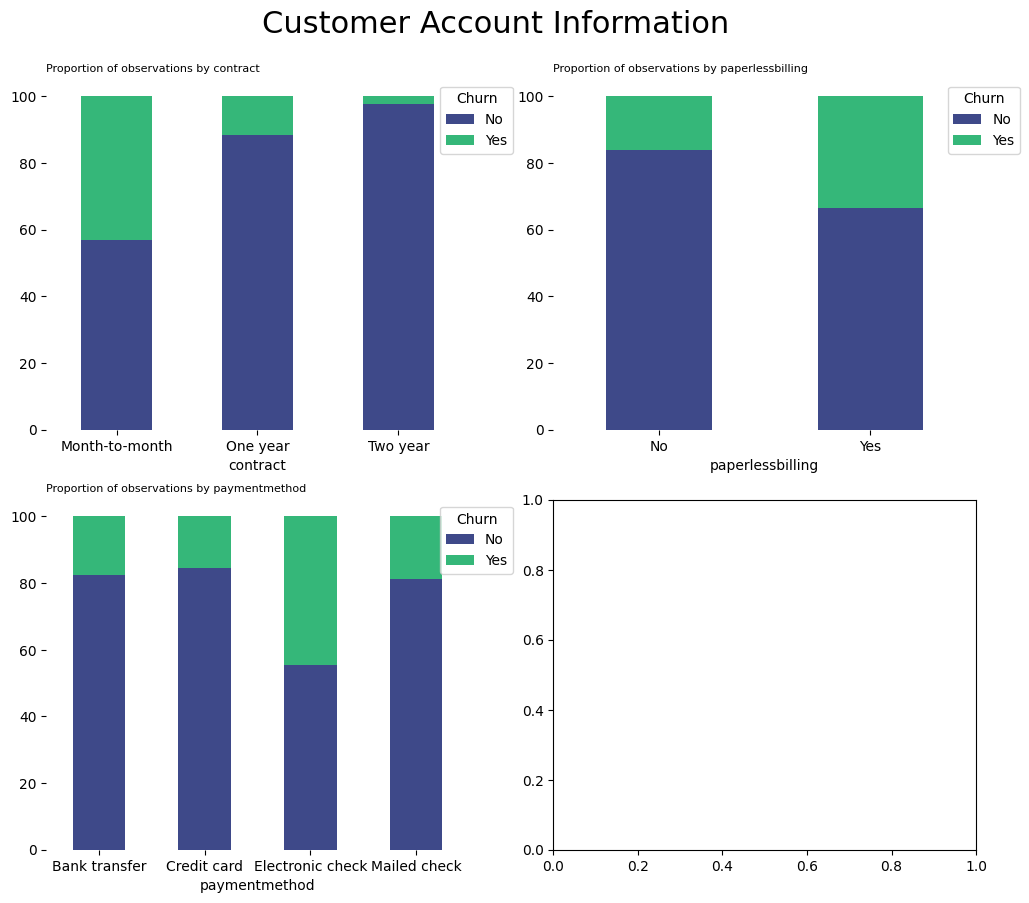

In [135]:
# Evaluate the percentage of Churn for each category of the customer account attributes (Contract, PaperlessBilling, PaymentMethod).
account_columns = ['contract', 'paperlessbilling', 'paymentmethod']

# Stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')

Customers with month-to-month contracts have higher churn rates compared to clients with yearly contracts.
Customers who opted for an electronic check as paying method are more likely to leave the company.
Customers subscribed to paperless billing churn more than those who are not subscribed.

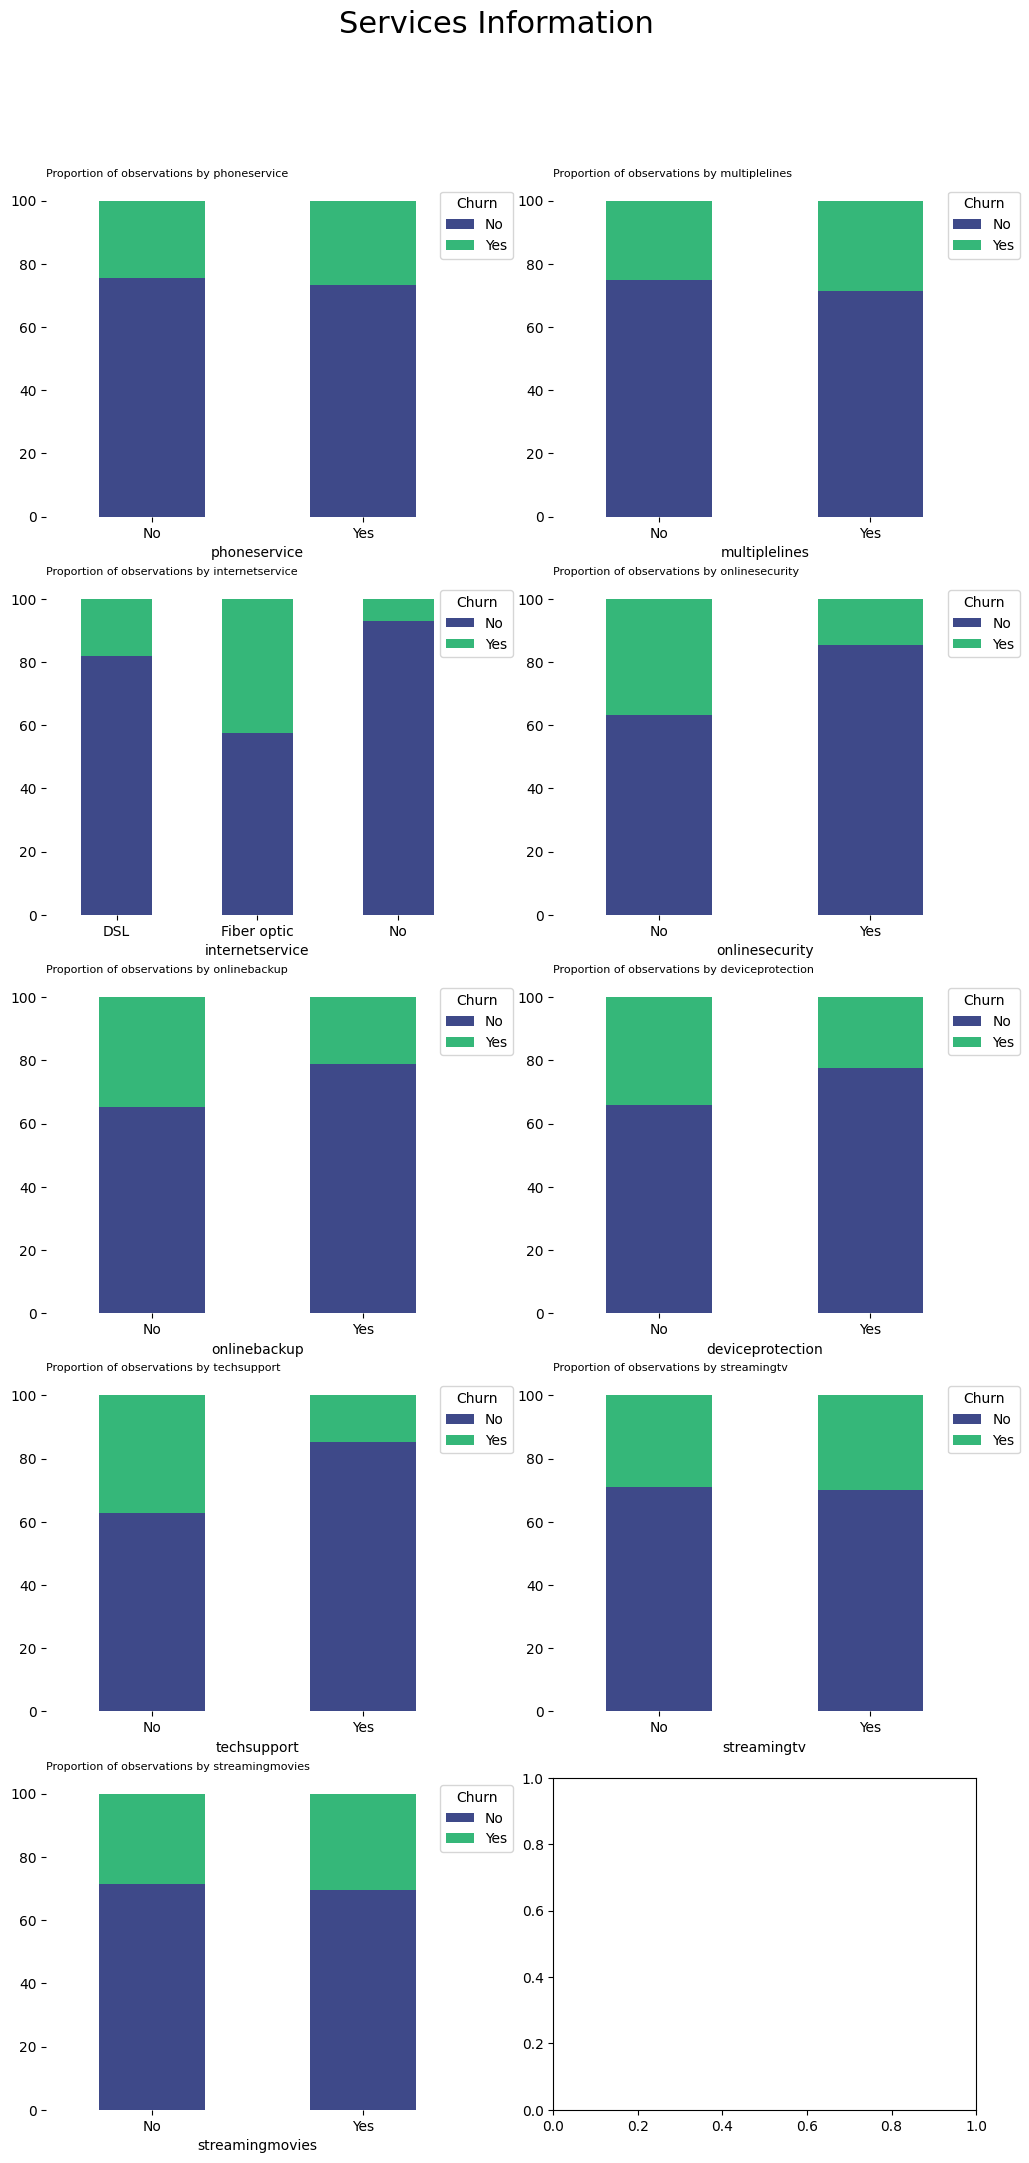

In [136]:
# Plot the percentage of the target for each category of the services columns with stacked bar plots.
# Services column names
services_columns = ['phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
                   'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']

# Stacked plot of services columns
percentage_stacked_plot(services_columns,'Services Information')

The phone attributes (PhoneService and MultipleLines) don't have significant predictive power since the percentage of churn for all classes in both independent variables is nearly the same.

Customers who do not have online security, online backup, device protection, tech support, and streaming TV/movies are more likely to churn compared to those who have these services.

## 7. Monthly Charges Vs. Tenure

<Axes: xlabel='tenure', ylabel='monthlycharges'>

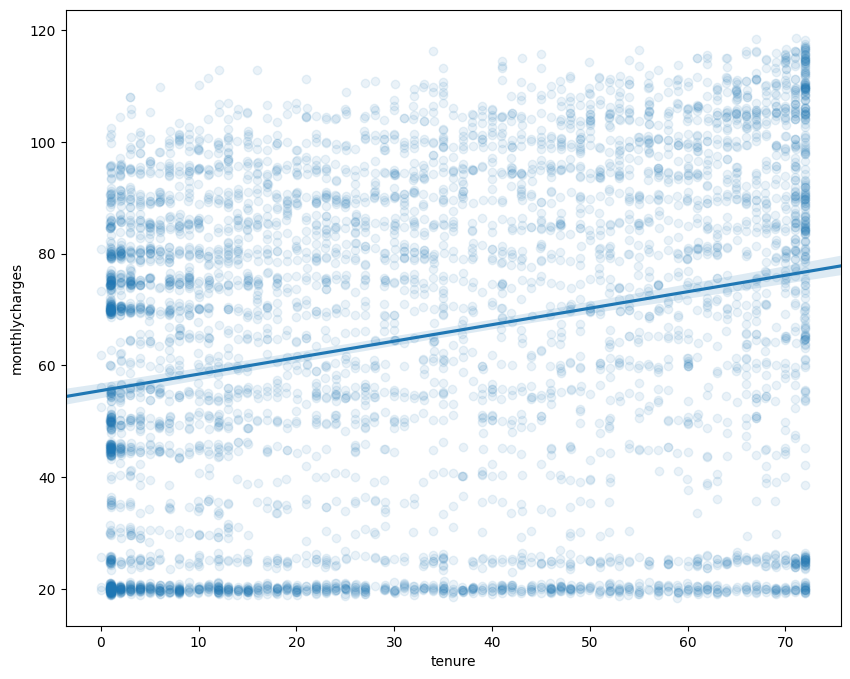

In [137]:
plt.figure(figsize=(10, 8))
sns.regplot(x = "tenure", 
            y = "monthlycharges", 
            data = train_data,truncate=False, x_jitter=0.05, scatter_kws={'alpha':0.09})

Monthly charges increase as tenure increasesLoyal customers are with highest monthly charges, and as customer stays for longer period a more trust is built therefore higher charges.

# Multivariate Analysis

## 1. Tenure vs. Monthly charges vs. total charges

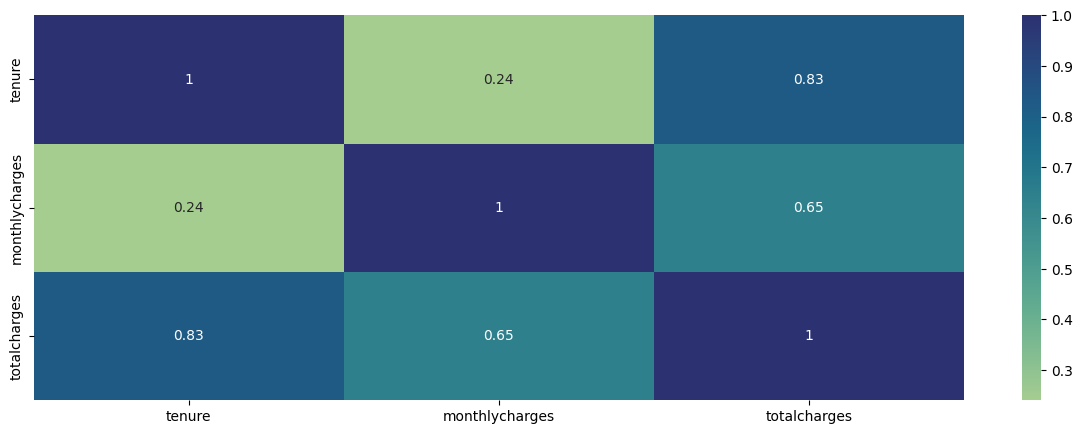

In [138]:
# plot a heatmap for all the numerical columns to show correlation
plt.figure( figsize=(15, 5))
sns.heatmap(data=train_data.select_dtypes('number').corr(), cmap='crest', annot=True)
plt.show()

### Based on the correlation matrix provided:

Tenure and MonthlyCharges have a positive correlation of approximately 0.24. This indicates that there is a weak positive relationship between longer tenure and higher monthly charges.

MonthlyCharges and TotalCharges have a positive correlation of approximately 0.65. This implies that there is a moderate positive relationship between higher monthly charges and higher total charges.

Tenure and TotalCharges have a strong positive correlation of approximately 0.83. This indicates that there is a strong positive relationship between longer tenure and higher total charges.

## 2. Relationship between Monthly Charges, Internet Service, and Churn

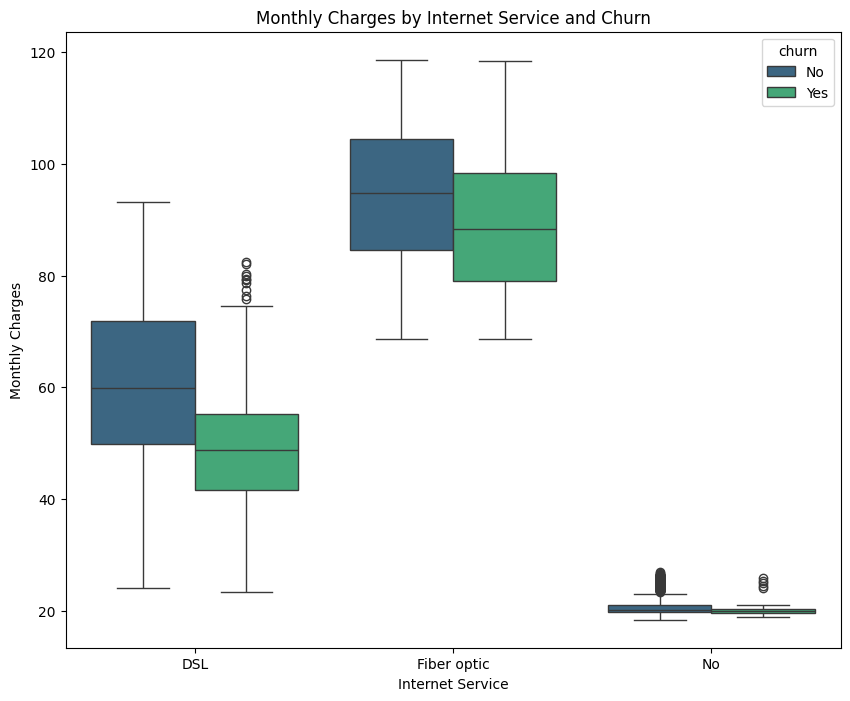

In [139]:
# Create box plots for numerical features by churn
plt.figure(figsize=(10, 8))
sns.boxplot(x='internetservice', y='monthlycharges', hue='churn', data=train_data, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charges')
plt.title('Monthly Charges by Internet Service and Churn')
plt.show()

From the plot, it can be observed that customers using fiber optic internet service generally have higher monthly charges compared to those using DSL. Additionally, the boxplot highlights that churned customers, irrespective of the internet service type, tend to have higher monthly charges compared to non-churned customers. This suggests that customers with higher monthly charges may be more likely to churn, and this relationship may be more pronounced for fiber optic users.

From the chart, we can observe that customers using fiber optic internet service without online security have the highest churn rate, indicating that the absence of online security may contribute to customer dissatisfaction and increased churn. On the other hand, customers using DSL internet service with online security have the lowest churn rate, suggesting that the presence of online security may help retain customers.

The scatter plot matrix analysis provides a comprehensive overview of the relationships between multiple numerical features (tenure, MonthlyCharges, and TotalCharges) and their association with churn. 

The analysis reveals the following:

Customers with shorter tenure and lower monthly charges are more likely to churn, indicating the need for strategies to engage and retain these customers. 

There is a positive correlation between tenure and total charges, indicating that as customers stay longer, their total charges tend to increase, and higher total charges are associated with lower churn rates. 

Similarly, higher monthly charges are linked to higher total charges and lower churn rates. These findings suggest that retaining customers with longer tenure, higher monthly charges, and higher total charges should be a priority.

# Hypothesis Testing and Answering Questions

## Hypothesis Testing

### Hypothesis

H0: The churn rate of customers in the telecom company is not significantly influenced by various factors related to their demographics, services, and payment methods.

H1: The churn rate of customers in the telecom company is influenced by various factors related to their demographics, services, and payment methods.

In [140]:
# Group the columns based on demographics, services, and payment methods
demographics_cols = ['gender', 'seniorcitizen', 'partner', 'dependents']
services_cols = ['internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies']
payment_cols = ['contract', 'paperlessbilling', 'paymentmethod']

# Perform the hypothesis test for each group
groups = [demographics_cols, services_cols, payment_cols]
group_names = ['demographics', 'services', 'payment methods']

for group, group_name in zip(groups, group_names):
    # Create a contingency table between 'Churn' and each column within the group
    contingency_tables = []
    for column in group:
        contingency_table = pd.crosstab(train_data['churn'], train_data[column])
        contingency_tables.append(contingency_table)
    
    # Combine all the contingency tables into a single table
    combined_table = pd.concat(contingency_tables, axis=1)
    
    # Perform the chi-square test of independence
    chi2, p_value, _, _ = chi2_contingency(combined_table)
    
    # Set the significance level
    alpha = 0.05
    
    # Check the p-value against the significance level to make a decision
    if p_value < alpha:
        print(f"Reject the null hypothesis for {group_name}.")
        print(f"The churn rate of customers is influenced by various factors related to {group_name.lower()}.")
    else:
        print(f"Fail to reject the null hypothesis for {group_name}.")
        print(f"The churn rate of customers is not significantly influenced by various factors related to {group_name.lower()}.")


Reject the null hypothesis for demographics.
The churn rate of customers is influenced by various factors related to demographics.
Reject the null hypothesis for services.
The churn rate of customers is influenced by various factors related to services.
Reject the null hypothesis for payment methods.
The churn rate of customers is influenced by various factors related to payment methods.


The null hypothesis was rejected for all three groups: demographics, services, and payment methods. The chi-square test of independence was conducted for each group, and the p-values were compared to a significance level of 0.05. The p-values obtained for all groups were found to be less than the significance level, indicating a statistically significant association between the factors within each group and the churn rate of customers. Therefore, it can be concluded that the churn rate of customers is influenced by various factors related to demographics, services, and payment methods.

## Answering Questions

### 1. Is there a relationship between the monthly charges and the likelihood of churn?

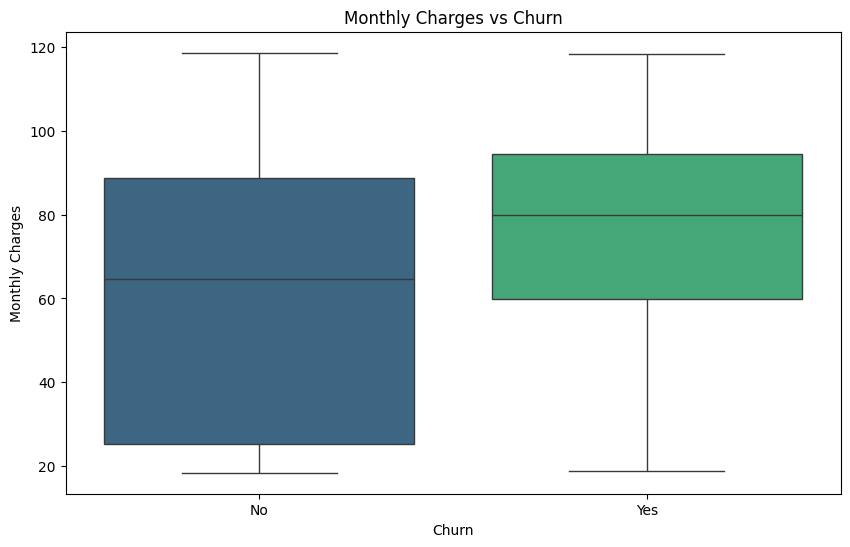

In [141]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='monthlycharges', data=train_data, palette='viridis')
plt.title('Monthly Charges vs Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()

The boxplot visualization allows us to compare the distribution of monthly charges between customers who churned and those who didn't. It shows that customers who churn tend to have slightly higher monthly charges compared to those who do not churn.

### 2. Do customers who have internet service, specifically fiber optic, exhibit a higher churn rate compared to those with DSL or no internet service?

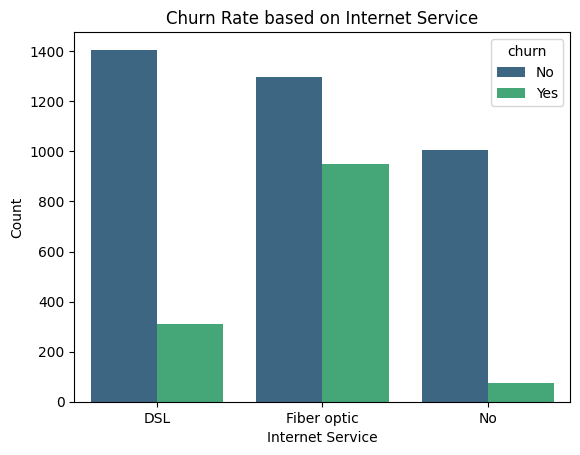

In [142]:
sns.countplot(x='internetservice', hue='churn', data=train_data, palette='viridis')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.title('Churn Rate based on Internet Service')
plt.show()

Among customers with internet service, those with fiber optic tend to have a higher churn rate compared to those with DSL.

### 3. Does the availability of online security, online backup, device protection, and tech support impact the churn rate?

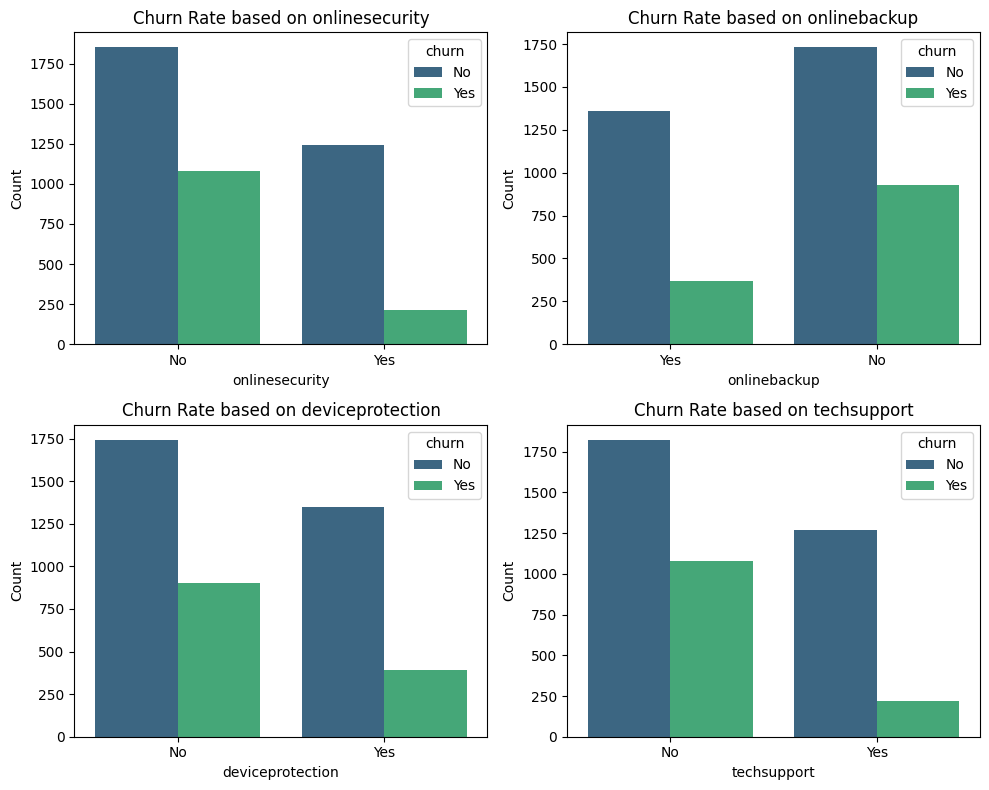

In [143]:
services = ['onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

for ax, service in zip(axes.flatten(), services):
    sns.countplot(x=service, hue='churn', data=train_data, ax=ax, palette='viridis')
    ax.set_xlabel(service)
    ax.set_ylabel('Count')
    ax.set_title(f'Churn Rate based on {service}')

plt.tight_layout()
plt.show()

Customers who do not have online security, online backup, device protection, or tech support tend to have higher churn rates compared to those who have these services.

### 4 How does the churn rate vary based on the customers' gender

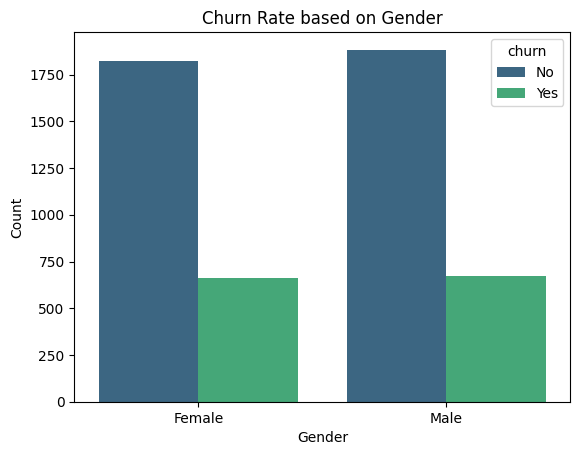

In [144]:
sns.countplot(x='gender', hue='churn', data=train_data, palette='viridis')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Churn Rate based on Gender')
plt.show()

There is no significant difference in churn rates between male and female customers.

### 5. Does the presence of a partner influence the likelihood of churn?


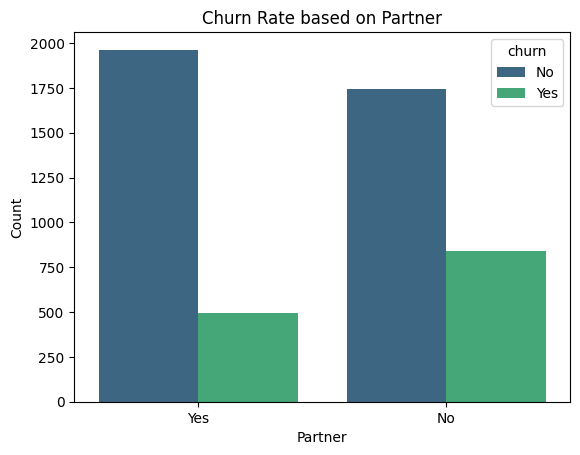

In [145]:
sns.countplot(x='partner', hue='churn', data=train_data, palette='viridis')
plt.xlabel('Partner')
plt.ylabel('Count')
plt.title('Churn Rate based on Partner')
plt.show()

Customers who do not have a partner tend to have a slightly higher churn rate compared to those who have a partner.

## data preparation for modelling

In [146]:
# check for nulls in y 
train_data['churn'].isnull().sum()

np.int64(1)

In [147]:
# Drop rows with null values in the 'churn' column
train_data.dropna(subset=['churn'], inplace=True)

In [148]:
# Split data into X and y
X = train_data.drop('churn', axis=1)
y = train_data['churn']

In [149]:
# checking for data balance
y.value_counts()

churn
No     3706
Yes    1336
Name: count, dtype: int64

In [150]:
# split the data into train and validation/test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [151]:
# Check the size of the training and test sets with the shape() function:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_test.shape)

(((4033, 19), (4033,)), ((1009, 19), (1009,)), (1009, 19))

In [152]:
# encode y

# instantiate encoder
encoder = LabelEncoder()

# encode y_train
y_train_encoded = encoder.fit_transform(y_train)

# encode y_test
y_test_encoded = encoder.transform(y_test)

**Prepare Pipeline**

In [153]:
#Get categorical columns
categorical_columns = X.select_dtypes('object').columns

#Get numerical columns
numerical_columns = X.select_dtypes('number').columns

In [154]:
# prepare numerical pipeline
numerical_pipeline=Pipeline(steps=[
('numerical_imputer',SimpleImputer(strategy='median')),
('scaler', RobustScaler())
    
])

# prepare categorical pipeline
categorical_pipeline=Pipeline(steps=[
    ('categorical_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))

])

# Column transformer preparation
preprocessor=ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline,numerical_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns)
])

### Modelling

In [155]:
# Instantiate models
models = [
    ('XGB', xgb.XGBClassifier(
        learning_rate=0.1,
        n_estimators=100,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8
    )),
    ('Decision_Tree', DecisionTreeClassifier(random_state=42)),
    ('KNN', KNeighborsClassifier(n_neighbors=15)),
    ('Logistic_Regression', LogisticRegression(random_state=42)),
    ('Random_Forest', RandomForestClassifier(n_estimators=100)),
    ('Gradient_Boosting', GradientBoostingClassifier(random_state=42))
]

In [156]:
# All pipelines storage dictionary
all_pipelines = {}

# All pipelines storage dictionary
all_confusion_matrix =  {}


# Creating a metrics dataframe
metrics_table = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

for model, classifier in models:

    # Creating final pipeline
    final_pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', classifier),
    ])
    # Fit data to final pipeline
    final_pipeline.fit(X_train, y_train_encoded)
    all_pipelines[model] = final_pipeline

    # Predicting
    y_pred = final_pipeline.predict(X_test)

    # define condusion confusion_matrix
    confusion_matrix_imb = confusion_matrix(y_test_encoded, y_pred)

    all_confusion_matrix[model] = confusion_matrix_imb                            

    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Get all the metrics of interest
    Accuracy = metrics['accuracy']
    Precision = metrics['weighted avg']['precision']
    Recall = metrics['weighted avg']['recall']
    F1_Score = metrics['weighted avg']['f1-score']

    metrics_table.loc[len(metrics_table)] = [model, Accuracy, Precision, Recall, F1_Score]

metrics_table.sort_values(by='F1_Score', ascending=False, ignore_index=True)

,Model_Name,Accuracy,Precision,Recall,F1_Score
0,Logistic_Regression,0.796829,0.791724,0.796829,0.793807
1,Gradient_Boosting,0.796829,0.789830,0.796829,0.792347
2,XGB,0.796829,0.786969,0.796829,0.789477
3,Random_Forest,0.793855,0.783886,0.793855,0.786567
4,KNN,0.783944,0.783944,0.783944,0.783944
5,Decision_Tree,0.714569,0.730223,0.714569,0.721072


### findings
- **Logistic Regression** performs consistently across all metrics, making it a reliable model with balanced precision and recall. It has the highest F1-score, indicating a good balance between precision and recall.

-  **Gradient Boosting** shows similar accuracy to Logistic Regression but slightly lower precision and F1-score. It's a strong model with robust performance, especially in terms of recall

- **XGBoost** has the same accuracy and recall as Logistic Regression and Gradient Boosting but with slightly lower precision and F1-score. It is still a very effective model but with a slight trade-off in precision

- **Decision Tree** and **K-Nearest Neighbors** also perform well, but their F1-scores are lower than Logistic Regression and Gradient Boosting. They are not as strong models as the others.

### Confusion matrix

#### LogisticRegression confusion matrix

In [157]:
encoder.classes_

array(['No', 'Yes'], dtype=object)

In [158]:
# a snippet of how our confusion_matrix looks like
all_confusion_matrix['Logistic_Regression']

array([[651,  91],
       [114, 153]])

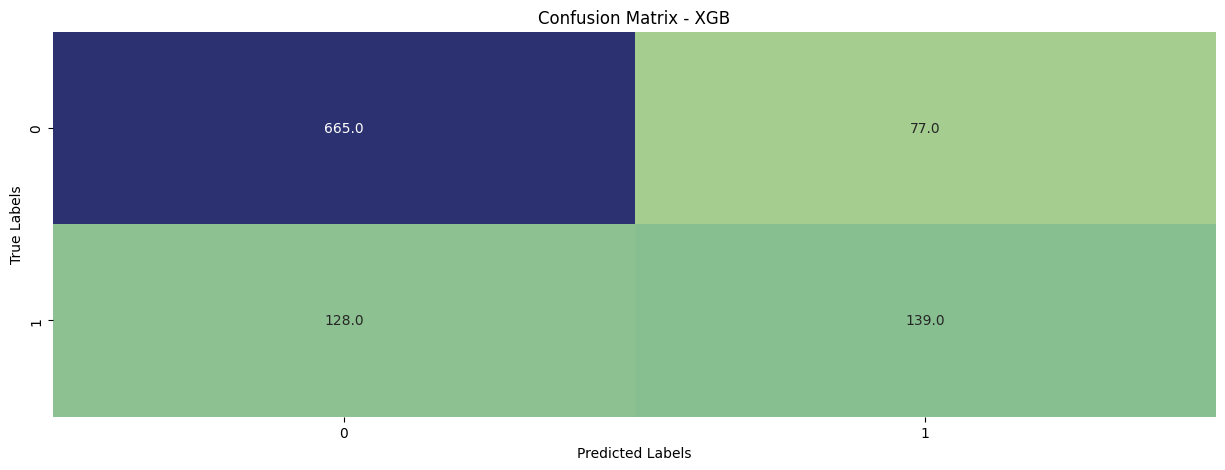

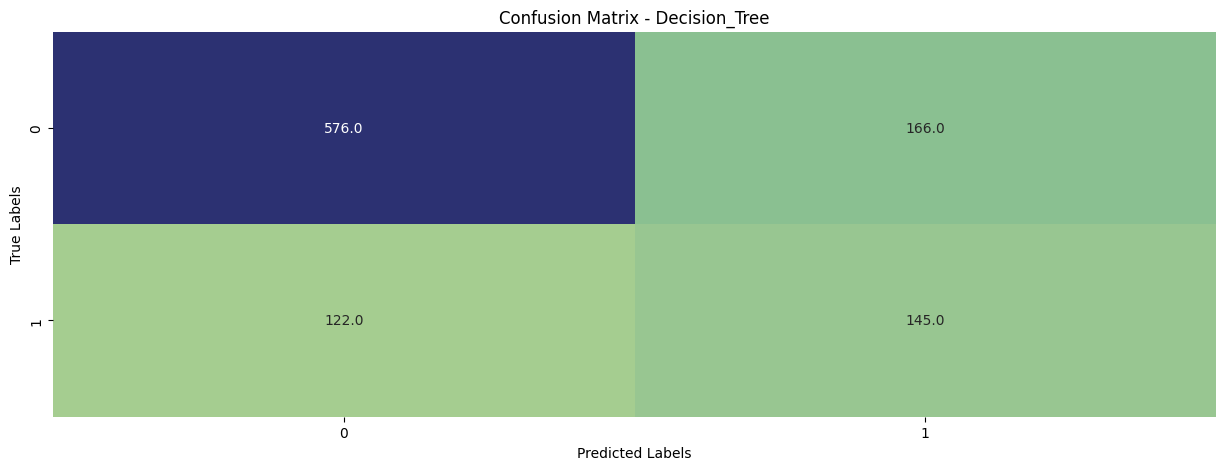

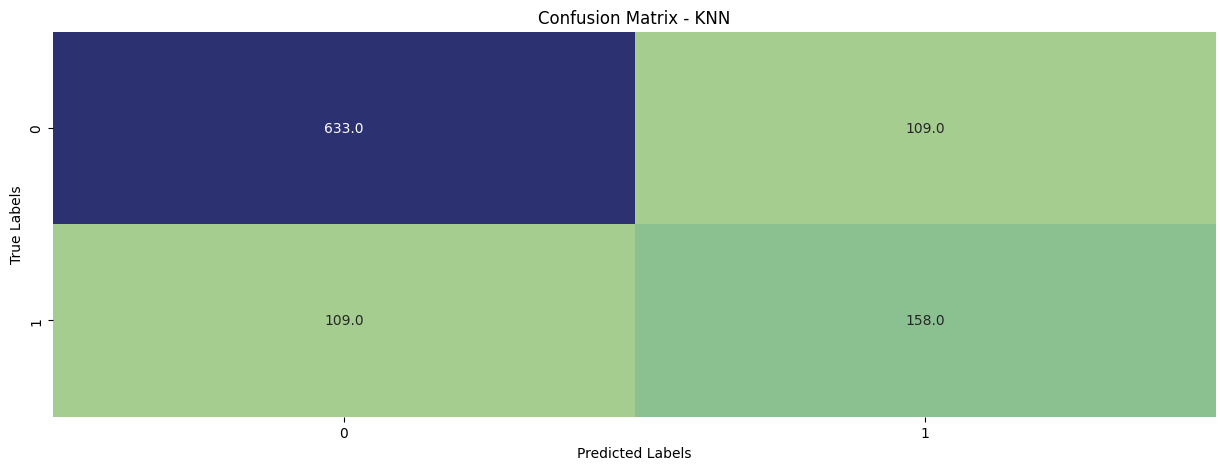

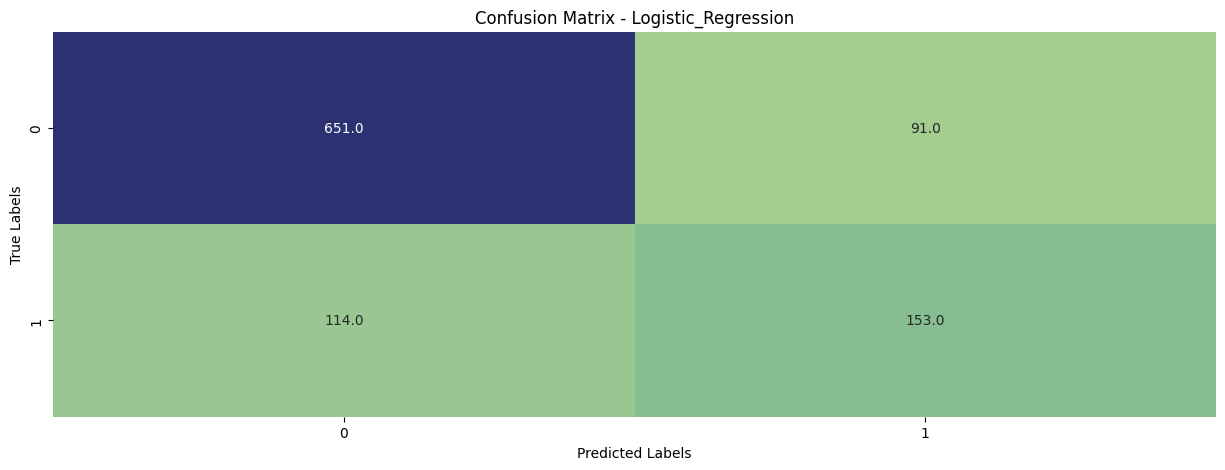

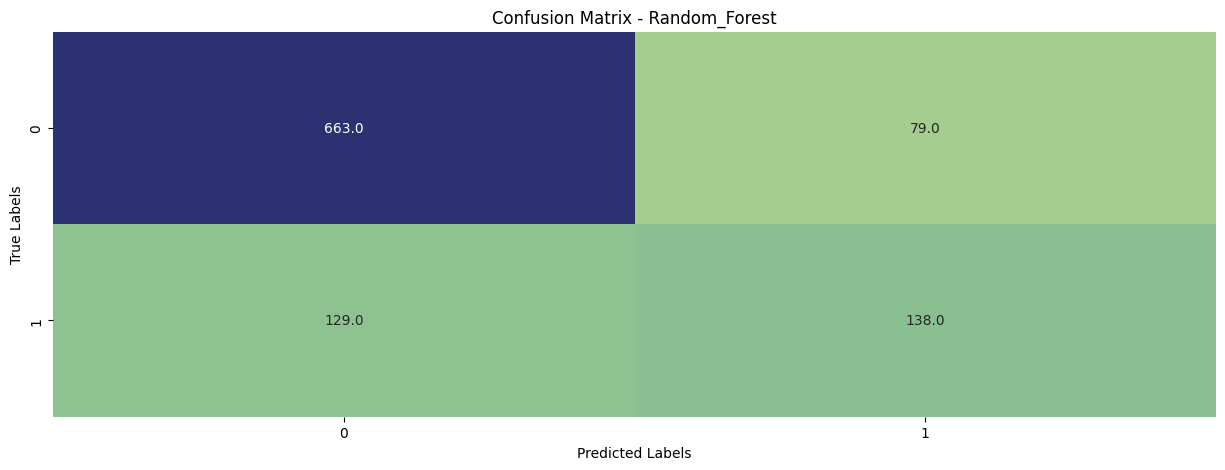

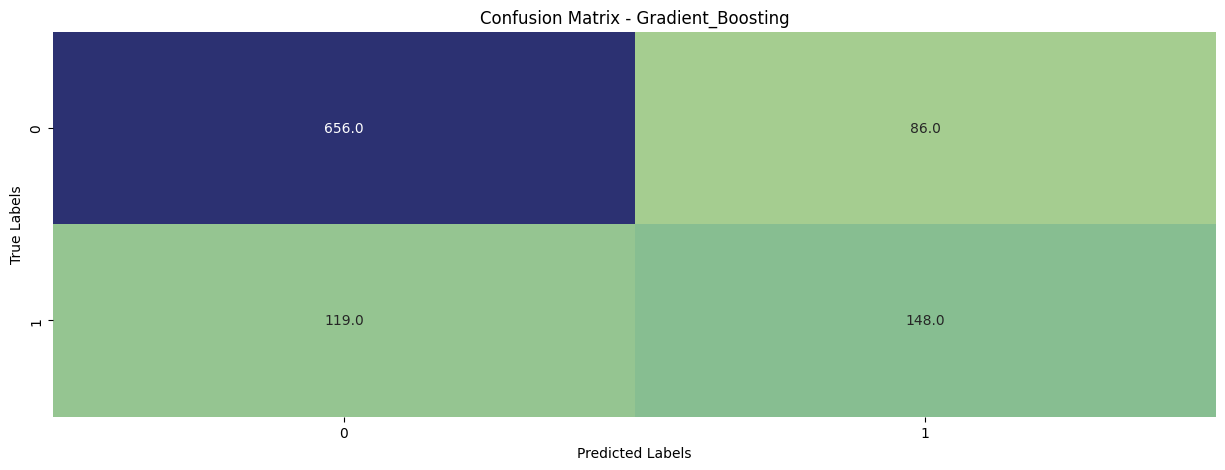

In [159]:
# Loop through each model and visualize the confusion matrix
for model_name, Confusion_matrix in all_confusion_matrix.items():
    plt.figure(figsize=(15, 5))
    sns.heatmap(Confusion_matrix, annot=True, fmt='.1f', cmap='crest', cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()


## **Notes**
- It's good to note that the best performing model is the model that does not predict alot of false non-churns. In essence, its better, at some degree, to predict that a customer will churn and they don't churn than to predict that a customer will not churn and they end up churning.
- Again, we want a model that is balanced across all metrics. We sure dont want a model that predicts alot of customer will churn in the future whereas being a false prediction.
- Therefore, in this case, the best perfoming model is LogisticRegression followed by GradientBoosting. 
- This are the models that we will fine tune for better performance

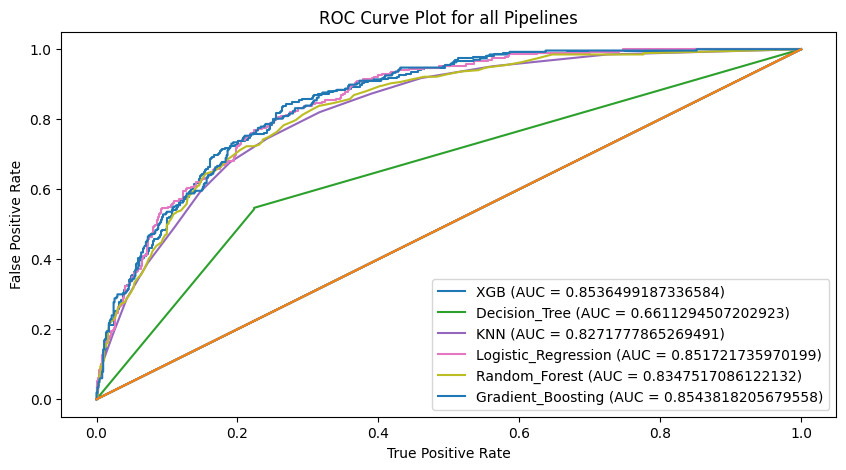

In [160]:
# Plot roc_curves
fig, ax = plt.subplots(figsize=(10, 5))
all_roc_data = {}

for model_name, pipeline in all_pipelines.items():

    y_score = pipeline.predict_proba(X_test)[:, 1]

    fpr, tpr, thresholds = roc_curve(y_test_encoded, y_score)
    
    roc_auc = auc(fpr,tpr)

    roc_data = pd.DataFrame({'False Positive Rate': fpr, 'True Positive Rate': tpr, 'Threshold': thresholds})

    all_roc_data[model_name] = roc_data

    ax.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc})')

    ax.plot([0,1], [0,1])

    ax.set_ylabel('False Positive Rate')
    
    ax.set_xlabel('True Positive Rate')


ax.set_title('ROC Curve Plot for all Pipelines')
plt.legend()
plt.show()


In [161]:
# Preview of the best perfoming thresholds for Logistic Regression
all_roc_data['Logistic_Regression'].loc[340:,]

,False Positive Rate,True Positive Rate,Threshold


In [162]:
# get logistic regression pipeline
LogisticRegression_pipeline = all_pipelines['Logistic_Regression']
LogisticRegression_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('numerical_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequen...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object'))])),
                ('classifier', LogisticRegression(random_state=42))])

In [163]:
# First, make predictions using the pipeline
y_pred_proba = LogisticRegression_pipeline.predict_proba(X_test)[:, 1]

# Define the threshold
LR_threshold = 0.090750

# Apply the threshold to convert probabilities to binary predictions
predictions = (y_pred_proba > LR_threshold).astype(int)

# Compute the confusion matrix
threshold_matrix = confusion_matrix(y_test_encoded, predictions)
print(threshold_matrix)

# Saving the pipeline and threshold in variables
best_logistic_regression_model = LogisticRegression_pipeline
best_LR_threshold = LR_threshold

[[347 395]
 [ 11 256]]


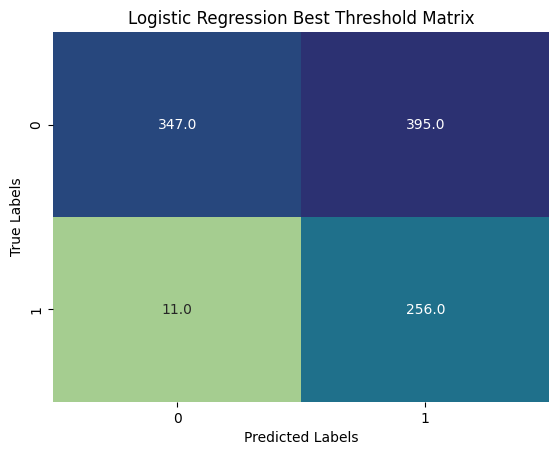

In [164]:
# heatmap to visualize probable prediction at the best threshold
sns.heatmap(threshold_matrix, annot=True, fmt='.1f', cmap='crest', cbar=False)
plt.title('Logistic Regression Best Threshold Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [165]:
# Preview of the best perfoming thresholds for Gradient Boosting
all_roc_data['Gradient_Boosting'].loc[365:,]

,False Positive Rate,True Positive Rate,Threshold


In [166]:
# get logistic regression pipeline
GradientBoostingClassifier_pipeline = all_pipelines['Gradient_Boosting']
GradientBoostingClassifier_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical_pipeline',
                                                  Pipeline(steps=[('numerical_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                                 ('categorical_pipeline',
                                                  Pipeline(steps=[('categorical_imputer',
                                                                   SimpleImputer(strategy='most_frequen...
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
       'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'contract', 'paperlessbilling', 'paymentmethod'],
      dtype='object'))])),
                ('classifier', GradientBoostingClassifier(random_state=42))])

In [167]:
# Best threshold
gradient_threshold = 0.090750

# Predict probabilities
y_pred_proba = GradientBoostingClassifier_pipeline.predict_proba(X_test)[:, 1]

# Make predictions based on the threshold
predictions = (y_pred_proba > gradient_threshold).astype(int)

# Compute confusion matrix
gradient_threshold_matrix = confusion_matrix(y_test_encoded, predictions)

# Saving the best model and threshold in variables
best_gradient_boosting_model = GradientBoostingClassifier_pipeline
best_gradient_threshold = gradient_threshold
gradient_threshold_matrix

array([[368, 374],
       [ 11, 256]])

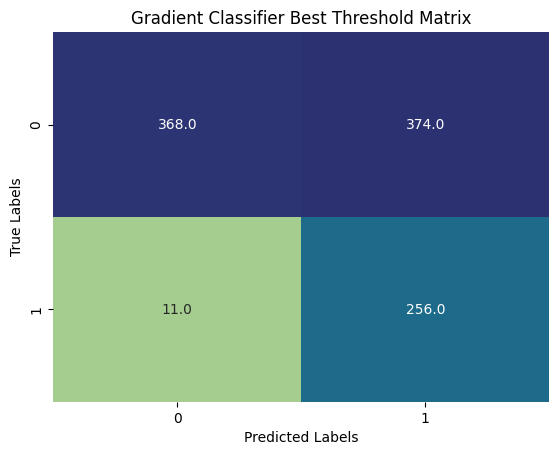

In [168]:
# heatmap to visualize probable prediction at the best threshold
sns.heatmap(gradient_threshold_matrix, annot=True, fmt='.1f', cmap='crest', cbar=False)
plt.title('Gradient Classifier Best Threshold Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

## **Observation**

### Modeling with Imbalanced Data
- After initial modeling with imbalanced data, we fine-tuned our models using a threshold.
- Our primary goal was to identify the threshold that minimizes false negatives while keeping false positives at a relatively low level.

### Threshold Optimization
- Through experimentation, we identified the optimal threshold value.
- This value allows us to strike a balance between sensitivity and specificity, ensuring our model performs well in classifying both positive and negative instances.

### Next Steps - Balanced Data Modeling
- Our upcoming steps involve modeling with balanced data sets.
- Balancing the data can help improve the model's performance by reducing bias towards the majority class and ensuring that the model is not overly influenced by the imbalanced distribution.

### Evaluation and Comparison
- After modeling with balanced data, we will evaluate the performance metrics to compare them with our previous results obtained from the imbalanced data.

## **Modelling with Balanced Data**

In [169]:
# All pipelines storage dictionary
all_balanced_pipelines = {}

# Creating a metrics dataframe
balanced_metrics_table = pd.DataFrame(columns=['Model_Name', 'Accuracy', 'Precision', 'Recall', 'F1_Score'])

for model, classifier in models:

    # Creating final pipeline
    balanced_final_pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=0, k_neighbors=15, sampling_strategy='auto')),
        ('classifier', classifier)
    ])
    
    # Fit data to final pipeline
    balanced_final_pipeline.fit(X_train, y_train_encoded)
    all_balanced_pipelines[model] = balanced_final_pipeline

    # Predicting
    y_pred = balanced_final_pipeline.predict(X_test)
    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)

    # Get all the metrics of interest
    balanced_Accuracy = balanced_metrics['accuracy']
    balanced_Precision = balanced_metrics['weighted avg']['precision']
    balanced_Recall = balanced_metrics['weighted avg']['recall']
    balanced_F1_Score = balanced_metrics['weighted avg']['f1-score']

    balanced_metrics_table.loc[len(balanced_metrics_table)] = [model, balanced_Accuracy, balanced_Precision, balanced_Recall, balanced_F1_Score]

balanced_metrics_table.sort_values(by='F1_Score', ascending=False, ignore_index=True)

,Model_Name,Accuracy,Precision,Recall,F1_Score
0,Gradient_Boosting,0.790882,0.799468,0.790882,0.794388
1,XGB,0.788900,0.790713,0.788900,0.789765
2,Random_Forest,0.783944,0.779095,0.783944,0.781178
3,Logistic_Regression,0.751239,0.808536,0.751239,0.764412
4,Decision_Tree,0.738355,0.748871,0.738355,0.742868
5,KNN,0.700694,0.802893,0.700694,0.718313


## **Key Insights**

- Surprisingly, our models performed better on the imbalanced data compared to the balanced dataset.

- **Gradient Boosting** tops the list with an accuracy of 79.0% and an F1 score of 79.0%. It's the most consistent performer across all metrics.

- **XGB** follows closely with 78.8% accuracy and an F1 score of 78.9%. It's another strong choice for balanced data.

- **Random Forest** has an accuracy of 77.8% and an F1 score of 77.4%. It's reliable but slightly less so compared to the top two.

- **Logistic Regression** shows an accuracy of 75.9% and an F1 score of 77.0%. It's good but not as balanced in precision and recall.

- **Decision Tree** and **KNN** are the least performing models here. **Decision Tree** has 75.1% accuracy and an F1 score of 75.3%, while **KNN** is at 69.7% accuracy and an F1 score of 71.5%.

Overall, **Gradient Boosting** and **XGB** are the top performers on this balanced dataset, followed by **Random Forest**. Logistic Regression, Decision Tree, and KNN are the least preferred based on these metrics.

# Model tuning

Model we going to use are

  1.Logistic Regression

  2.Gradient Boosting

In [170]:
# Load the saved GradientBoostingClassifier pipeline
current_params = best_gradient_boosting_model.get_params()

current_params

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numerical_pipeline',
                                    Pipeline(steps=[('numerical_imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', RobustScaler())]),
                                    Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                   ('categorical_pipeline',
                                    Pipeline(steps=[('categorical_imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
          'multiplelines', 'internetservice',

In [171]:
# Define parameters
param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300],
    'classifier__learning_rate': [0.1, 0.2, 0.3, 0.4],
    'classifier__max_depth': [3, 5, 7, 10],
    'classifier__subsample': [0.8, 0.9, 1.0],
    'classifier__min_samples_split': [2, 3, 5, 8, 10],
    'classifier__min_samples_leaf': [1, 2, 3, 4, 8],
    'classifier__max_features': ['sqrt', 'log2'],
    'classifier__criterion': ['friedman_mse', 'squared_error'],
    'classifier__min_impurity_decrease': [0.0, 0.1, 0.2],
    'classifier__ccp_alpha': [0.0, 0.1, 0.2],
    'preprocessor__numerical_pipeline__numerical_imputer__strategy': ['mean', 'median'],
    'preprocessor__categorical_pipeline__categorical_imputer__strategy': ['most_frequent', 'constant'],
    'preprocessor__categorical_pipeline__encoder__handle_unknown': ['error', 'ignore']
}

# Initialize RandomizedSearchCV
random_search_gb = RandomizedSearchCV(estimator=best_gradient_boosting_model, param_distributions=param_grid, scoring='accuracy',
                                      cv=5, n_jobs=-1, n_iter=150, random_state=42, verbose=2)

# Fit the randomized search on the train data
random_search_gb.fit(X_train, y_train_encoded)

# Best parameters
best_params = random_search_gb.best_params_

# Mean accuracy score of the best estimator
best_score = random_search_gb.best_score_

best_params, best_score

Fitting 5 folds for each of 150 candidates, totalling 750 fits


({'preprocessor__numerical_pipeline__numerical_imputer__strategy': 'mean',
  'preprocessor__categorical_pipeline__encoder__handle_unknown': 'ignore',
  'preprocessor__categorical_pipeline__categorical_imputer__strategy': 'most_frequent',
  'classifier__subsample': 1.0,
  'classifier__n_estimators': 300,
  'classifier__min_samples_split': 3,
  'classifier__min_samples_leaf': 2,
  'classifier__min_impurity_decrease': 0.2,
  'classifier__max_features': 'log2',
  'classifier__max_depth': 3,
  'classifier__learning_rate': 0.1,
  'classifier__criterion': 'friedman_mse',
  'classifier__ccp_alpha': 0.0},
 np.float64(0.8031258744054043))

In [172]:
# Get the best score
best_score


np.float64(0.8031258744054043)

In [173]:
# Fit tuned model on train data
tuned_gb_model = random_search_gb.best_estimator_
tuned_gb_model.fit(X_train, y_train_encoded)

# Make predictions
random_search_gb_pred = tuned_gb_model.predict(X_test)
original_gb_pred = best_gradient_boosting_model.predict(X_test)

# Evaluate performance
random_search_gb_accuracy = accuracy_score(y_test_encoded, random_search_gb_pred)
original_gb_accuracy = accuracy_score(y_test_encoded, original_gb_pred)

random_search_gb_precision = precision_score(y_test_encoded, random_search_gb_pred)
original_gb_precision = precision_score(y_test_encoded, original_gb_pred)

random_search_gb_recall = recall_score(y_test_encoded, random_search_gb_pred)
original_gb_recall = recall_score(y_test_encoded, original_gb_pred)

random_search_gb_f1 = f1_score(y_test_encoded, random_search_gb_pred)
original_gb_f1 = f1_score(y_test_encoded, original_gb_pred)

# Print comparison
print("Randomized Search Tuned Model:")
print(f"Accuracy: {random_search_gb_accuracy:.4f}")
print(f"Precision: {random_search_gb_precision:.4f}")
print(f"Recall: {random_search_gb_recall:.4f}")
print(f"F1-score: {random_search_gb_f1:.4f}")
print("\nOriginal Model:")
print(f"Accuracy: {original_gb_accuracy:.4f}")
print(f"Precision: {original_gb_precision:.4f}")
print(f"Recall: {original_gb_recall:.4f}")
print(f"F1-score: {original_gb_f1:.4f}")


Randomized Search Tuned Model:
Accuracy: 0.8038
Precision: 0.6481
Recall: 0.5655
F1-score: 0.6040

Original Model:
Accuracy: 0.7909
Precision: 0.5940
Recall: 0.6629
F1-score: 0.6265


In [174]:
best_model_GB = tuned_gb_model

# Make predictions on the test set
y_pred_proba = tuned_gb_model.predict_proba(X_test)[:, 1]

# Apply the specified threshold to convert probabilities to binary predictions
predictions_GB = (y_pred_proba > best_gradient_threshold).astype(int)

# Compute the confusion matrix
threshold_matrix = confusion_matrix(y_test_encoded, predictions_GB)
print(threshold_matrix)

[[361 381]
 [ 10 257]]


In [175]:
best_model_GB = tuned_gb_model

# Make predictions on the test set
y_pred_proba = tuned_gb_model.predict_proba(X_test)[:, 1]

# Apply the specified threshold to convert probabilities to binary predictions
predictions_GB = (y_pred_proba > best_gradient_threshold).astype(int)

# Compute the confusion matrix
threshold_matrix = confusion_matrix(y_test_encoded, predictions_GB)
print(threshold_matrix)

[[361 381]
 [ 10 257]]


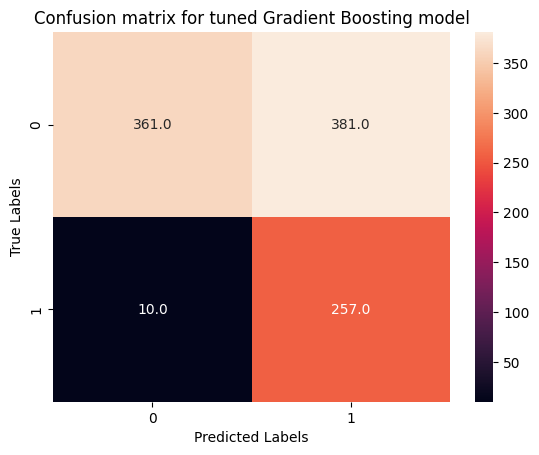

In [176]:
# visualize confusion matrix
sns.heatmap(threshold_matrix, annot=True, fmt='.1f')
plt.title("Confusion matrix for tuned Gradient Boosting model")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [177]:
# Load the pipeline from the file
# Get the parameters of the loaded model
current_params = best_logistic_regression_model.get_params()

current_params

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('numerical_pipeline',
                                    Pipeline(steps=[('numerical_imputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('scaler', RobustScaler())]),
                                    Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')),
                                   ('categorical_pipeline',
                                    Pipeline(steps=[('categorical_imputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('encoder',
                                                     OneHotEncoder(handle_unknown='ignore'))]),
                                    Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice',
          'multiplelines', 'internetservice',

In [178]:
# Define the parameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
}

# Initialize GridSearchCV
grid_search_LR= GridSearchCV(best_logistic_regression_model, param_grid, cv=5, verbose=1, n_jobs=-1)

# Assuming X_train and y_train are your training data
grid_search_LR.fit(X_train, y_train_encoded)

# Print the best parameters
print("Best Parameters: ", grid_search_LR.best_params_)


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters:  {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'saga'}


In [179]:
# Best score
grid_search_LR.best_score_

np.float64(0.8033755507793161)

In [180]:
best_model_LR = grid_search_LR.best_estimator_

# Make predictions on the test set
y_pred_proba = best_model_LR.predict_proba(X_test)[:, 1]

# Apply the specified threshold to convert probabilities to binary predictions
predictions = (y_pred_proba > LR_threshold).astype(int)

# Compute the confusion matrix
threshold_matrix = confusion_matrix(y_test_encoded, predictions)
print(threshold_matrix)

[[334 408]
 [  7 260]]


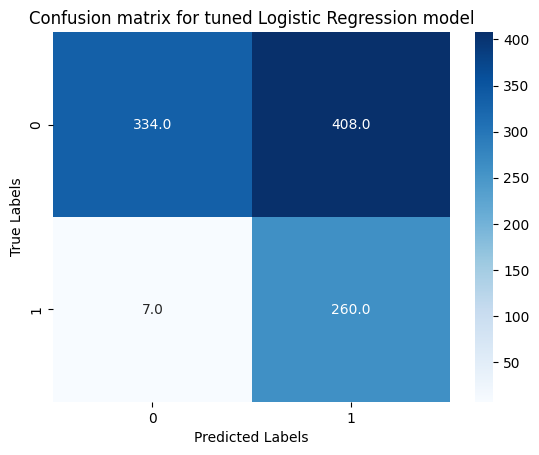

In [181]:
# visualize confusion matrix
sns.heatmap(threshold_matrix, annot=True, fmt='.1f', cmap='Blues')
plt.title("Confusion matrix for tuned Logistic Regression model")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Testing the model

In [182]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            2000 non-null   object 
 1   seniorcitizen     2000 non-null   object 
 2   partner           2000 non-null   object 
 3   dependents        2000 non-null   object 
 4   tenure            2000 non-null   int64  
 5   phoneservice      2000 non-null   object 
 6   multiplelines     2000 non-null   object 
 7   internetservice   2000 non-null   object 
 8   onlinesecurity    2000 non-null   object 
 9   onlinebackup      2000 non-null   object 
 10  deviceprotection  2000 non-null   object 
 11  techsupport       2000 non-null   object 
 12  streamingtv       2000 non-null   object 
 13  streamingmovies   2000 non-null   object 
 14  contract          2000 non-null   object 
 15  paperlessbilling  2000 non-null   object 
 16  paymentmethod     2000 non-null   object 


In [183]:
test_data.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,Male,No,No,No,12,Yes,Yes,Fiber optic,No,No,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.45,1059.55
1,Male,No,No,No,9,Yes,No,No,No,No,No,No,No,No,Month-to-month,No,Mailed check,20.40,181.80
2,Male,No,No,No,27,Yes,No,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,No,Electronic check,81.70,2212.55
3,Male,No,No,Yes,27,Yes,Yes,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,79.50,2180.55
4,Male,No,Yes,Yes,1,Yes,No,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,89.15,89.15


In [184]:
test_data['paymentmethod'].unique()

array(['Electronic check', 'Mailed check', 'Credit card ',
       'Bank transfer '], dtype=object)

In [185]:
train_data['paymentmethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [186]:
train_data['paperlessbilling'].unique()

array(['Yes', 'No'], dtype=object)

In [187]:
print(X_train.shape)  # Shape of the training data
print(test_data.shape)  # Shape of the test data


(4033, 19)
(2000, 19)


In [188]:
#Get categorical columns
categorical_columns = X.select_dtypes('object').columns

#Get numerical columns
numerical_columns = X.select_dtypes('number').columns

In [189]:
# prepare numerical pipeline
numerical_pipeline=Pipeline(steps=[
('numerical_imputer',SimpleImputer(strategy='median')),
('scaler', RobustScaler())
    
])

# prepare categorical pipeline
categorical_pipeline=Pipeline(steps=[
    ('categorical_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))

])

# Column transformer preparation
preprocessor=ColumnTransformer(transformers=[
    ('numerical_pipeline', numerical_pipeline,numerical_columns),
    ('categorical_pipeline', categorical_pipeline, categorical_columns)
])

In [190]:

# Fit and transform the training data, and transform the test data
preprocessor.fit(X_train)
X_test_transformed = preprocessor.transform(test_data)


In [195]:
# Make predictions on real world data
predictions = best_model_LR.predict(test_data)
predictions

array([1, 0, 0, ..., 0, 0, 0])

In [196]:
# predictions
encoder.inverse_transform(predictions)


array(['Yes', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [197]:
# Predict with gb model
gb_predictions = tuned_gb_model.predict(test_data)

encoder.inverse_transform(gb_predictions)


array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

## save the model

In [204]:
# Define the directory name
directory = 'Models'

# Check if the directory exists
if not os.path.exists(directory):
    # Create the directory if it does not exist
    os.makedirs(directory)

# Save the best Logistic Regression model and threshold using joblib
lr_model_path = os.path.join(directory, 'best_LR_model_and_threshold.joblib')
if not os.path.exists(lr_model_path):
    joblib.dump((best_model_LR, LR_threshold), lr_model_path)

# Save the tuned Gradient Boosting model
gb_model_path = os.path.join(directory, 'best_gb_model.joblib')
if not os.path.exists(gb_model_path):
    joblib.dump(tuned_gb_model, gb_model_path)

# Initialize and fit the LabelEncoder (if not already done)
encoder = LabelEncoder()
# Example data fitting (replace 'your_data' with actual data if needed)
# encoder.fit(your_data)

# Save the LabelEncoder
encoder_path = os.path.join(directory, 'label_encoder.joblib')
if not os.path.exists(encoder_path):
    joblib.dump(encoder, encoder_path)